# Important information about this EDA, (Exploratory Data Analysis)
Exploring the files in the 'data/processed/' directory<br>

**Please note:** The analysis will be divided into four distinct sections, each addressing different files, as outlined below::
- App usage in the phone, (Files: 'app_usage_count_motorola.csv' and 'app_usage_time_motorola.csv')
- Device unlocks analysis, (Files: 'device_unlocks_motorola.csv')
- Web usage count, (Files: 'web_usage_count_chrome.csv', 'web_usage_count_edge.csv', 'web_usage_count_motorola.csv')
- Web usage time, (Files: 'web_usage_time_chrome.csv', 'web_usage_time_edge.csv', 'web_usage_time_motorola.csv')

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

sns.set(style="whitegrid")

# Exploratory Data Analysis

## App usage in the phone

Connection to the sql server database

In [26]:
def read_from_sql_database(server, database, username, password, driver, queries):
    # Creating the SQLAlchemy connection
    connection_string = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver={driver}"
    engine = create_engine(connection_string)
    dataframes = {}
    for query in queries:
        dataframes[query.split()[-1]] = pd.read_sql(query, engine, parse_dates=['date'])
        
    return dataframes

# Connection parameters
server = 'DESKTOP-8PK64UI'
database = 'statistics_of_use_db'
username = 'main_estiven'
driver = 'ODBC+Driver+17+for+SQL+Server'

password_file_path = "database_pass.txt"
with open(password_file_path, "r") as file:
    password = file.read().strip()

Reading the files for App usage in the phone

In [27]:
sql_queries = ["SELECT * FROM app_usage_count_motorola", "SELECT * FROM app_usage_time_motorola"]
result_df = read_from_sql_database(server, database, username, password, driver, sql_queries)

app_count_motorola = result_df['app_usage_count_motorola']
app_time_motorola = result_df['app_usage_time_motorola']

count_columns = list(app_count_motorola.columns)
time_columns = list(app_time_motorola.columns)

Overview of the datasets

In [28]:
app_count_motorola.head(3)

,date,amazon_shopping,android_system,calculator,calendar,camera,chrome,classroom,clock,discord,drive,files,gmail,google,google_news,google_opinion_rewards,google_play_services,google_play_store,instagram,linkedin,maps,medium,mi_tigo,microsoft_365_(office),moto_app_launcher,nequi_colombia,notion,package_installer,photomath,photos,settings,siata,simcity,spotify,stellarium,symbolab,system_ui,tasks,teams,telegram,tiktok,truecaller,twitter,tyba,upwork_talent,whatsapp,youtube,youtube_music,zoom,total_usage
0,2022-10-19,0.0,1.0,5.0,3.0,0.0,24.0,5.0,8.0,0.0,11.0,2.0,4.0,0.0,4.0,2.0,1.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0,247.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,495.0
1,2022-10-20,0.0,2.0,6.0,0.0,0.0,8.0,0.0,8.0,0.0,3.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,18.0,0.0,2.0,0.0,0.0,0.0,174.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,1.0,0.0,0.0,0.0,82.0,5.0,0.0,0.0,347.0
2,2022-10-21,0.0,0.0,0.0,0.0,0.0,4.0,3.0,4.0,0.0,2.0,0.0,5.0,0.0,0.0,1.0,1.0,1.0,21.0,0.0,1.0,0.0,1.0,0.0,150.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,1.0,0.0,0.0,0.0,61.0,0.0,0.0,0.0,281.0


In [29]:
app_time_motorola.head(3)

,date,amazon_shopping,calculator,calendar,chrome,clock,com.activision.callofduty.shooter,discord,drive,gmail,google,google_news,google_play_store,hbo_max,instagram,linkedin,maps,medium,mi_tigo,microsoft_365_(office),moto_app_launcher,nequi_colombia,notion,photomath,photos,settings,simcity,spotify,symbolab,tasks,teams,telegram,tiktok,truecaller,twitter,tyba,upwork_talent,whatsapp,youtube,youtube_music,zoom,total_usage
0,2022-10-19,0.0,3.02,1.5,17.48,1.75,0.00,0.0,55.68,1.92,0.0,2.85,0.00,0.0,50.30,0.0,0.00,0.0,0.00,0.0,12.78,0.0,0.0,0.0,0.00,2.25,0.0,10.28,0.0,0.0,0.0,0.0,37.42,0.00,0.0,0.0,0.0,73.10,0.00,0.0,0.0,270.33
1,2022-10-20,0.0,1.57,0.0,5.28,0.90,19.43,0.0,11.72,0.00,0.0,0.05,0.00,0.0,46.17,0.0,1.15,0.0,0.00,0.0,11.62,0.0,0.0,0.0,0.00,3.30,0.0,2.78,0.0,0.0,0.0,0.0,87.10,0.02,0.0,0.0,0.0,61.83,12.98,0.0,0.0,265.90
2,2022-10-21,0.0,0.00,0.0,1.37,0.68,42.78,0.0,1.55,6.32,0.0,0.00,0.08,0.0,40.90,0.0,0.80,0.0,1.18,0.0,7.90,0.0,0.0,0.0,0.67,0.85,0.0,0.00,0.0,0.0,0.0,0.0,71.57,0.35,0.0,0.0,0.0,62.60,0.00,0.0,0.0,239.60


In [30]:
print(f'Shape of the motorola time usage dataframe, (ORIGINAL): {app_time_motorola.shape}\n\
Shape of the motorola count usage dataframe, (ORIGINAL): {app_count_motorola.shape}')

Shape of the motorola time usage dataframe, (ORIGINAL): (249, 42)
Shape of the motorola count usage dataframe, (ORIGINAL): (249, 50)


In [31]:
app_count_motorola['total_usage'].describe()

count     249.000000
mean      484.867470
std       132.527183
min       184.000000
25%       394.000000
50%       467.000000
75%       572.000000
max      1021.000000
Name: total_usage, dtype: float64

In [32]:
app_time_motorola['total_usage'].describe()

count    249.000000
mean     262.970964
std       85.175081
min       79.850000
25%      206.770000
50%      257.980000
75%      309.370000
max      551.600000
Name: total_usage, dtype: float64

## Data transformation and cleansing

In [33]:
def percentage_of_zeros(dataframe: pd.DataFrame, dataframe_column: str) -> float:
    """
    Calculate the percentage of zero values in a specific column of a pandas DataFrame.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    dataframe_column (str): The column name for which the percentage of zero values should be calculated.

    Returns:
    float: The percentage of zero values in the specified column, rounded to two decimal places.

    Example:
    >>> import pandas as pd
    >>> data = {'column_A': [0, 0, 3, 0, 5, 0, 0]}
    >>> df = pd.DataFrame(data)
    >>> percentage = percentage_of_zeros(df, 'column_A')
    >>> print(percentage)
    71.43
    """
    percentage_zeros = (dataframe[dataframe_column] == 0).astype(int).sum(axis=0) / dataframe.shape[0]
    return round(percentage_zeros * 100, 2)

Filtering the data so there are not too much zeros

In [34]:
# Creating a dictionary of the column name and its percentage of zeros
percentages_count = {}
for column in app_count_motorola:
    if column != 'date':
        percentages_count[column] = percentage_of_zeros(app_count_motorola, column)

# Filtering the data, columns with a percentage more than 70 of zeros will be dropped
columns_too_much_zeros_count = [key for key, value in percentages_count.items() if value > 70]
app_count_motorola = app_count_motorola.drop(columns=columns_too_much_zeros_count)
app_count_motorola.head()

# Same code but for time data
percentages_time = {}
for column in app_time_motorola:
    if column != 'date':
        percentages_time[column] = percentage_of_zeros(app_time_motorola, column)

columns_too_much_zeros_time = [key for key, value in percentages_time.items() if value > 70]
app_time_motorola = app_time_motorola.drop(columns=columns_too_much_zeros_time)
app_time_motorola.head()

,date,calculator,calendar,chrome,clock,drive,gmail,google,google_news,google_play_store,instagram,linkedin,maps,mi_tigo,moto_app_launcher,photos,settings,spotify,tasks,truecaller,twitter,whatsapp,youtube,total_usage
0,2022-10-19,3.02,1.5,17.48,1.75,55.68,1.92,0.00,2.85,0.00,50.30,0.00,0.00,0.00,12.78,0.00,2.25,10.28,0.0,0.00,0.0,73.10,0.00,270.33
1,2022-10-20,1.57,0.0,5.28,0.90,11.72,0.00,0.00,0.05,0.00,46.17,0.00,1.15,0.00,11.62,0.00,3.30,2.78,0.0,0.02,0.0,61.83,12.98,265.90
2,2022-10-21,0.00,0.0,1.37,0.68,1.55,6.32,0.00,0.00,0.08,40.90,0.00,0.80,1.18,7.90,0.67,0.85,0.00,0.0,0.35,0.0,62.60,0.00,239.60
3,2022-10-22,0.00,0.0,1.98,0.00,0.00,1.72,0.13,0.00,2.23,69.20,0.03,0.00,0.00,10.12,52.60,0.15,0.00,0.0,0.00,0.0,113.32,33.82,373.78
4,2022-10-23,0.52,0.0,5.80,1.43,0.00,5.58,0.00,0.00,0.15,41.65,0.00,0.13,0.00,10.70,5.12,0.52,0.00,0.0,0.07,0.0,50.78,95.12,452.84


In [35]:
print(f'Shape of the motorola time usage dataframe: {app_time_motorola.shape}\n\
Shape of the motorola count usage dataframe: {app_count_motorola.shape}')

Shape of the motorola time usage dataframe: (249, 24)
Shape of the motorola count usage dataframe: (249, 29)


Datasets distribution

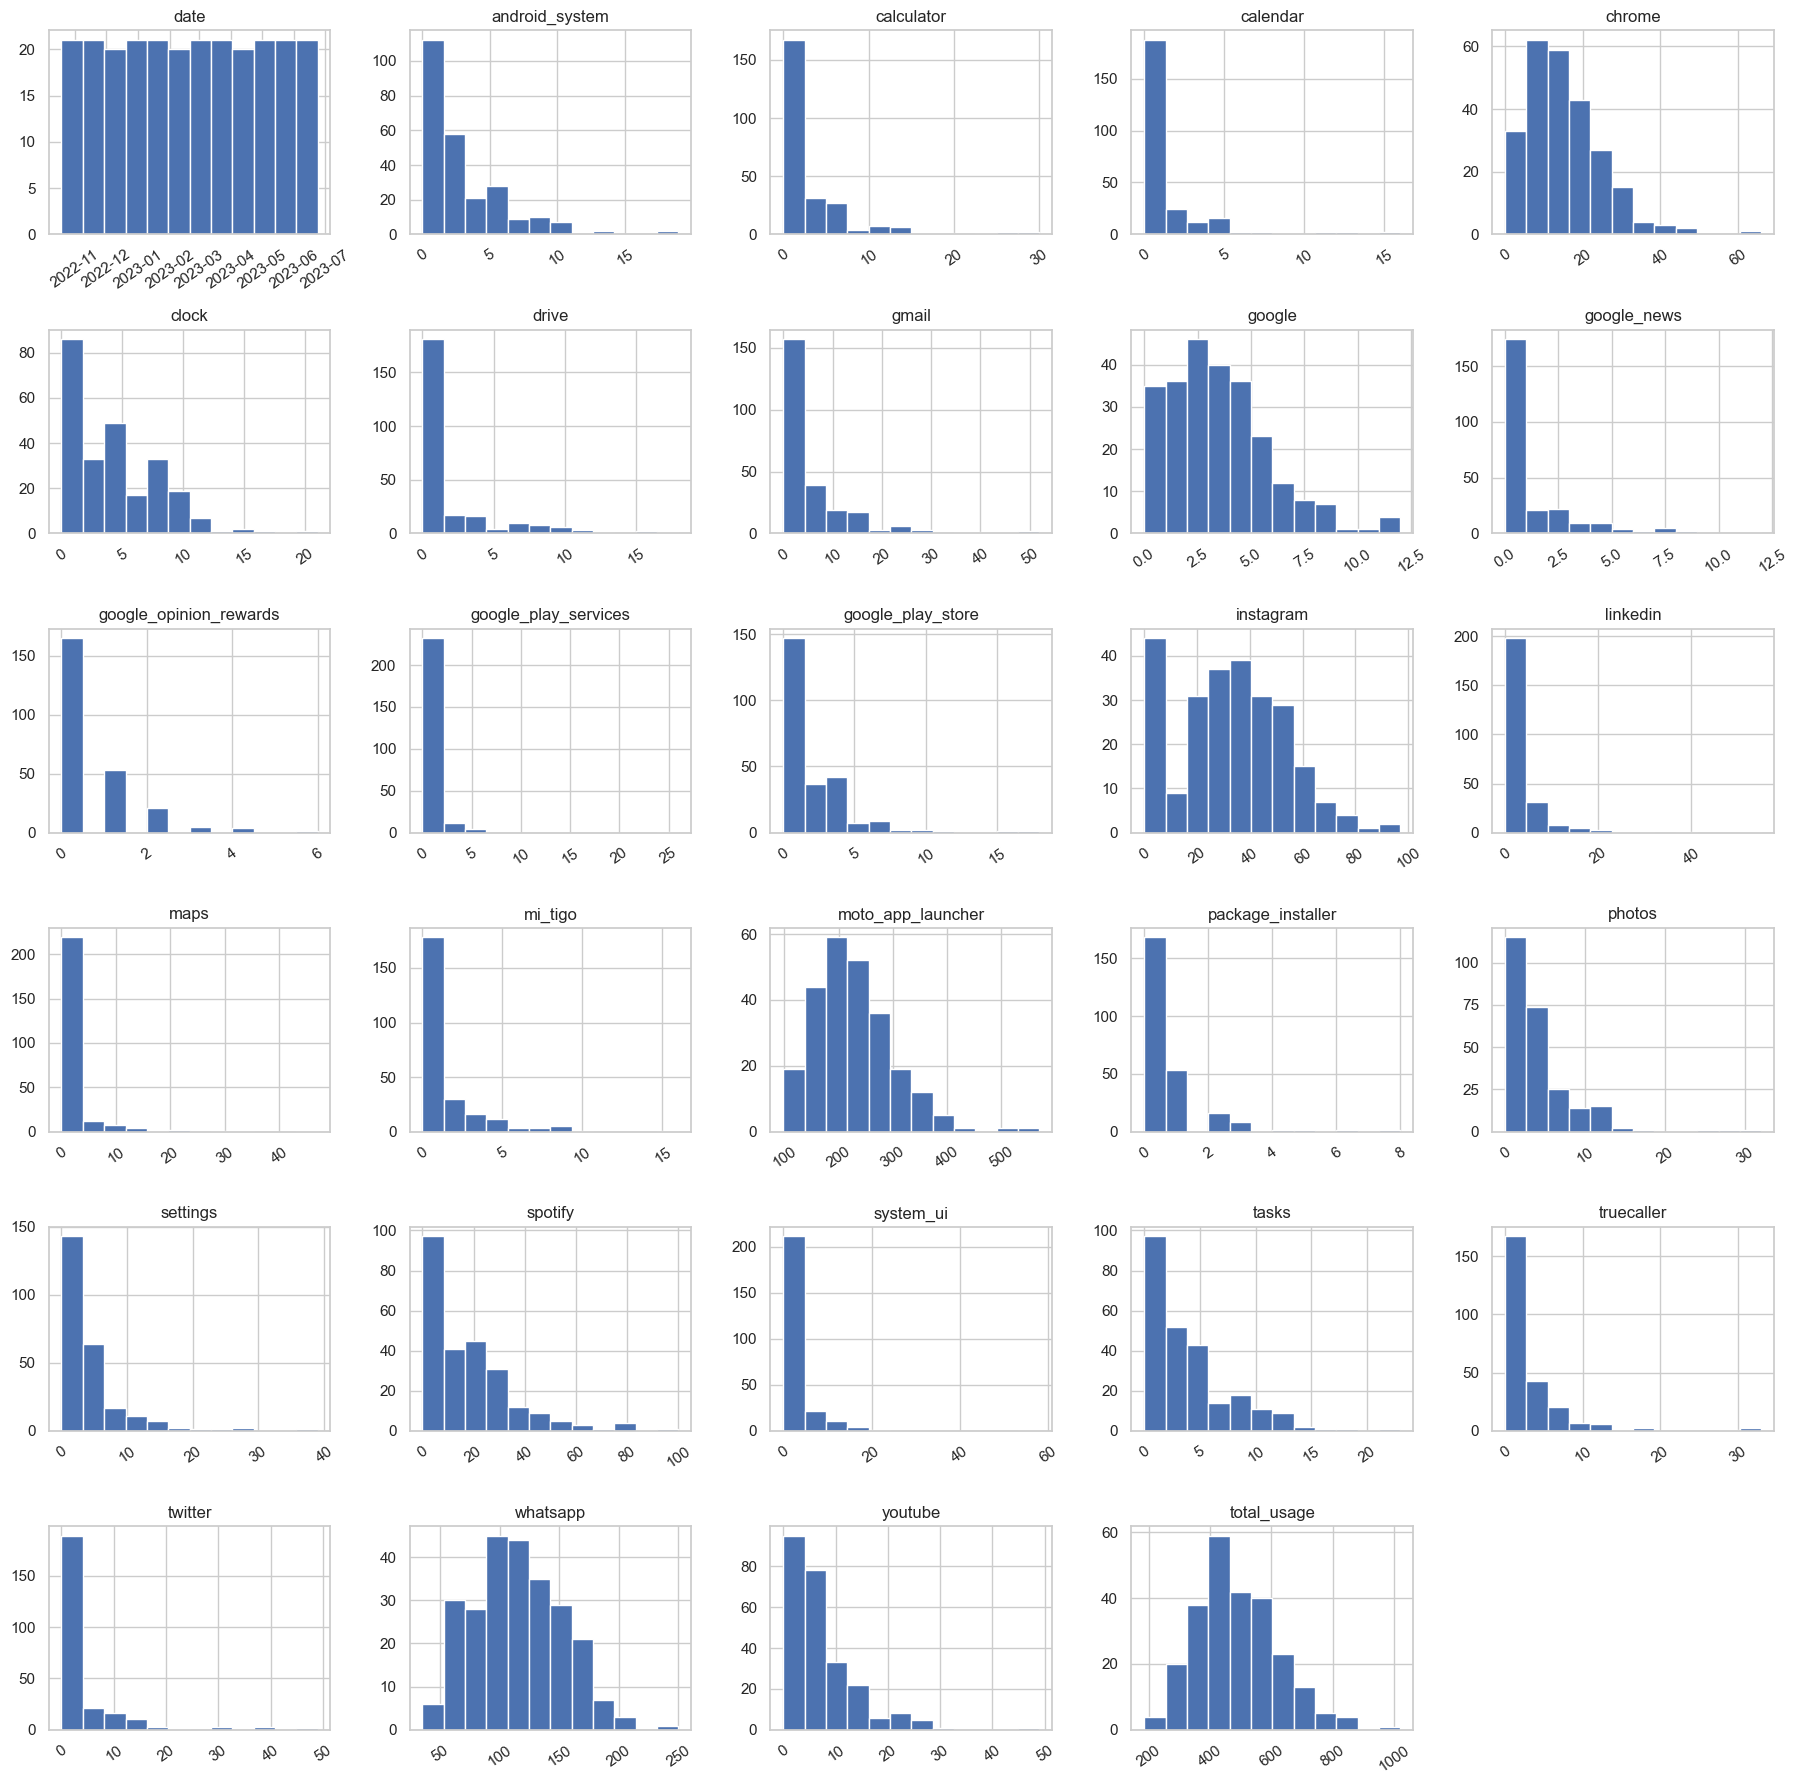

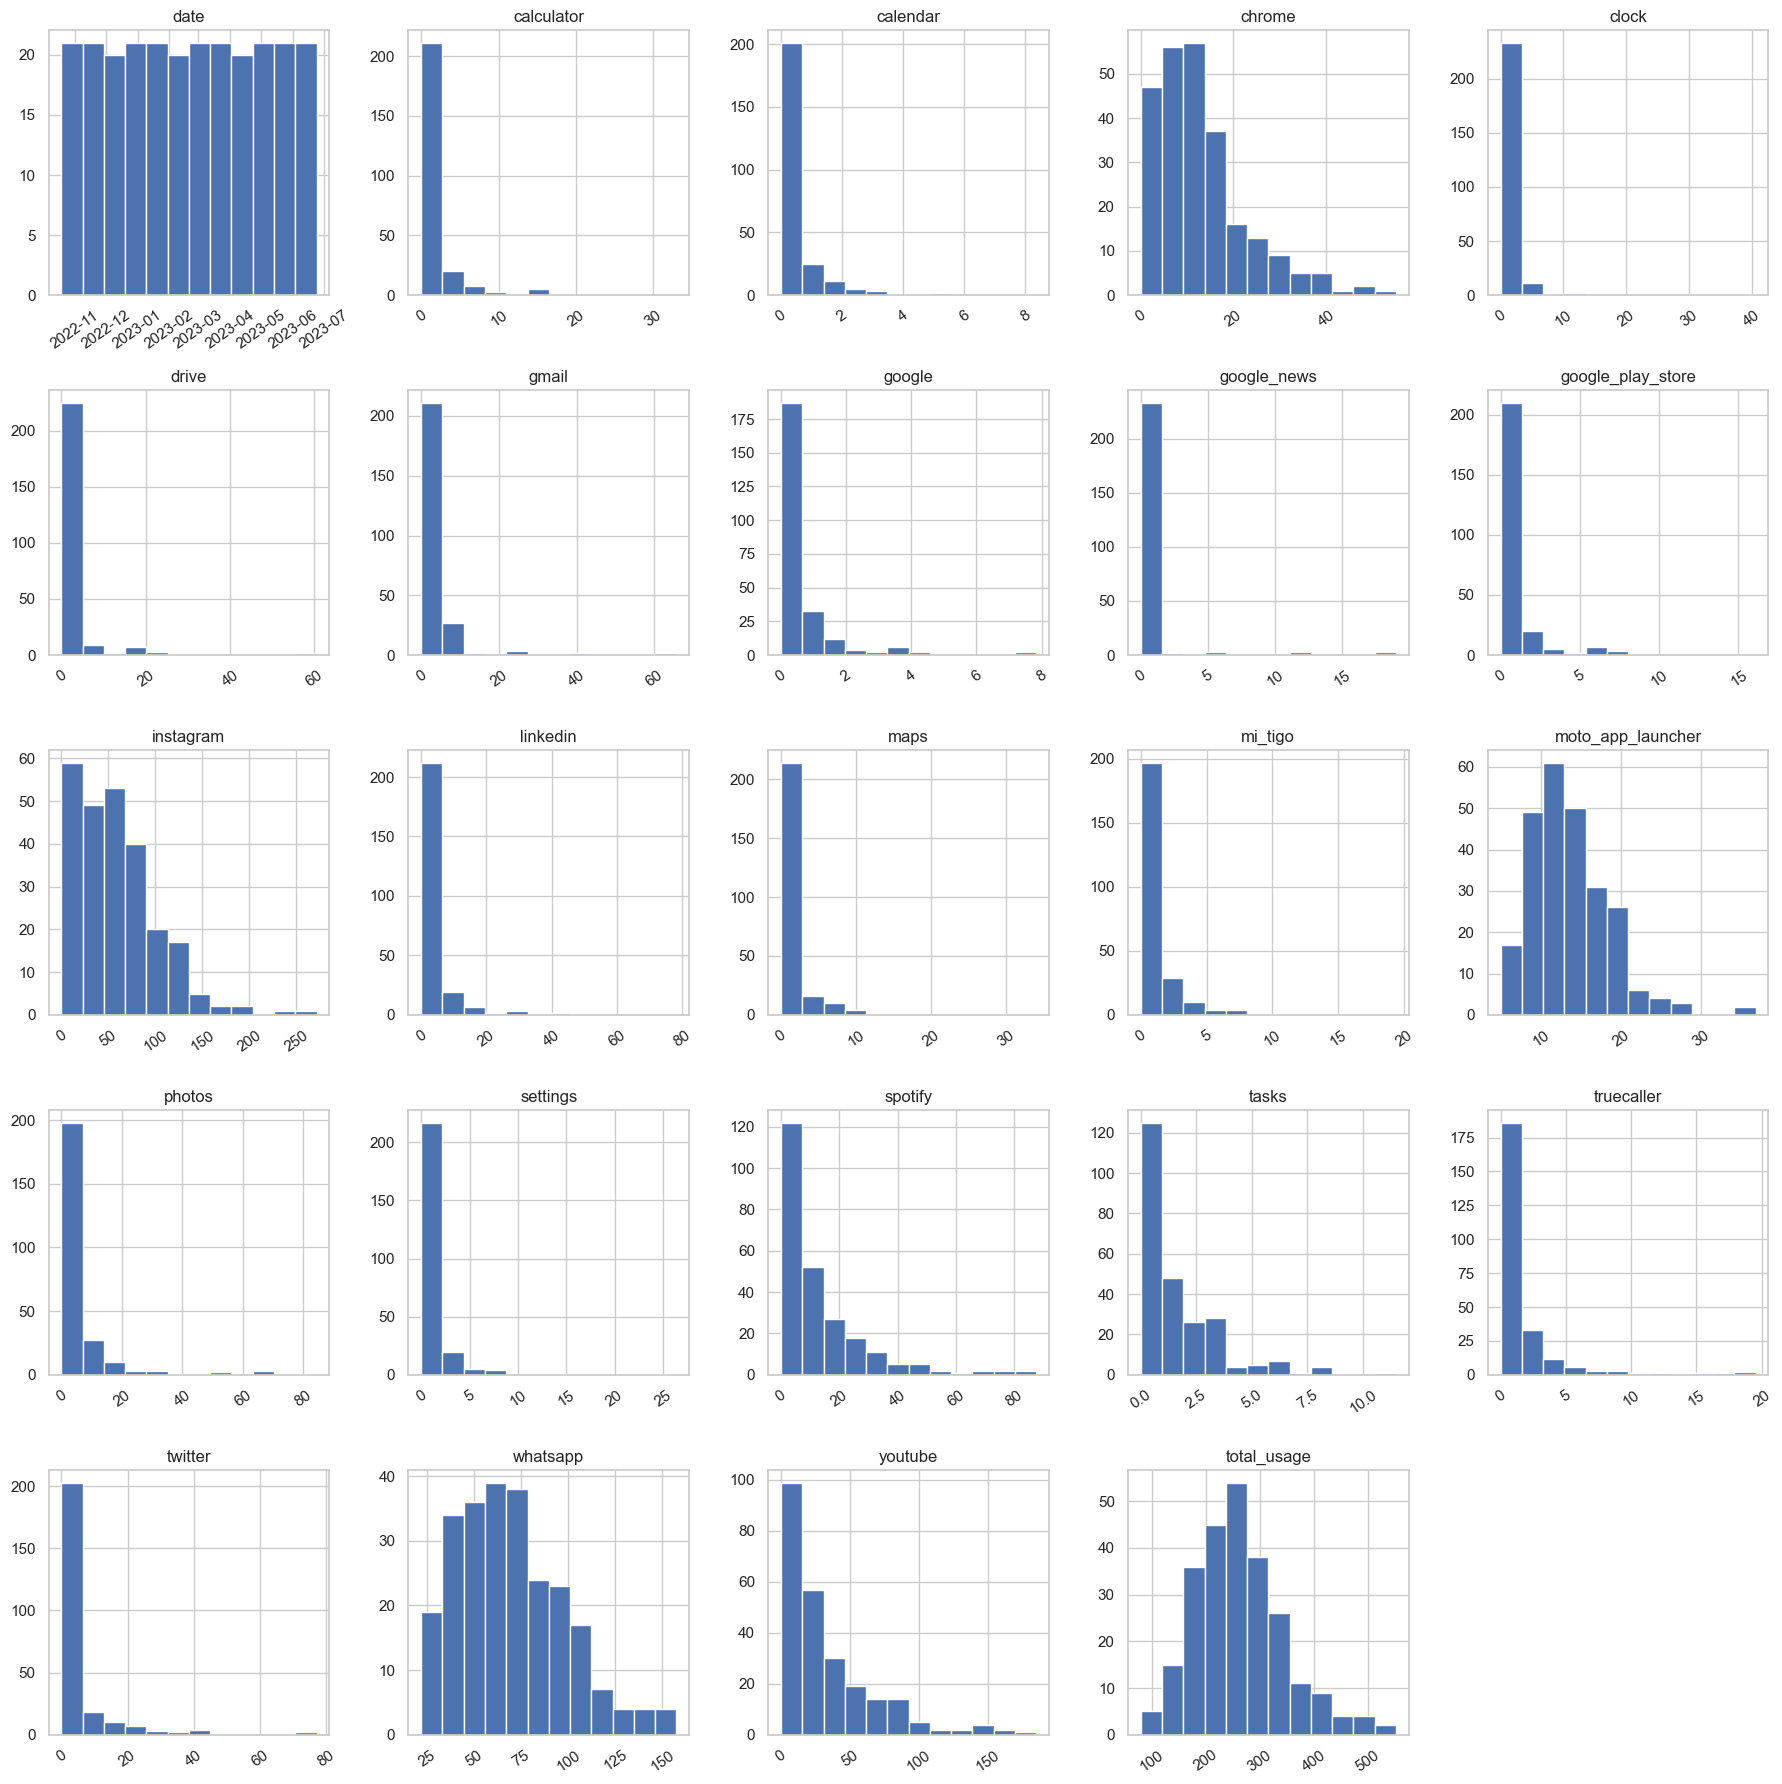

In [36]:
app_count_motorola.hist(figsize=(18, 18),
                    grid=True,
                    bins=12,
                    xrot=35)
plt.tight_layout()

app_time_motorola.hist(figsize=(18, 18),
                    grid=True,
                    bins=12,
                    xrot=35)
plt.tight_layout()
plt.show()